# GRIP : The Sparks Foundation


## Auther : Ajay Singh Shekhawat

## Data Science And Business Analytics Intern 

# Task 1 : Prediction Using Supervised ML

## Simple Linear Regression:

>> ### In this notebook, we'll build a simple linear regression model to predict percentage `Score` of student based on the no. of study hours  using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

 ### Importing the libraries and files

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
student=pd.read_csv("http://bit.ly/w-data")
print(student)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
student.shape

(25, 2)

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- As we can see no any null values present in any of the columns.

In [6]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- we use describe to check mathematical properties of the data sets.
- we can see that in both  hours and scores no much differencepresent  between mean and meadian that means no outliers present.

In [7]:
student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 2: Cleaning and Visualising of the Data

### >>>> plotting box plot on hours:

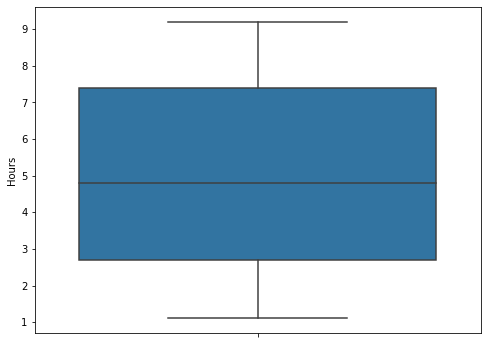

In [8]:
plt.figure(figsize = [8,6])
sns.boxplot(y = student.Hours)
plt.show()

### >>>> plotting box plot on scores:

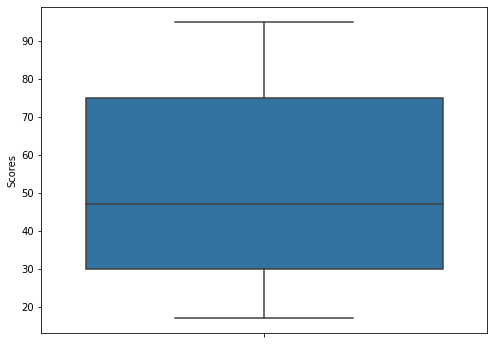

In [9]:
plt.figure(figsize = [8,6])
sns.boxplot(y = student.Scores)
plt.show()

## insights:
- as we can see that no any outliers present in both the variables i.e scores and hours.

### >>>> plotting scatter plot with hours and scores on the x axis and y axis respectively.

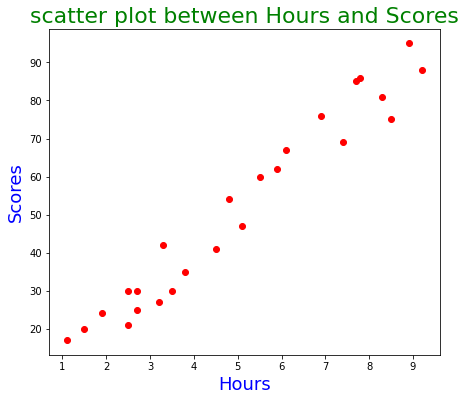

In [10]:
# plotting scatter plot
plt.figure(figsize = [7,6])
plt.scatter(x='Hours',y='Scores',data = student , color = 'red' )
plt.title('scatter plot between Hours and Scores',color = 'green',fontsize = 22)
plt.xlabel('Hours',color = 'blue',fontsize = 18)
plt.ylabel('Scores', color = 'blue',fontsize = 18)

plt.show()

- we plotted scatter plot between both respose and predictors.
- we find out that there are linear relationship present between both the variables.
- we furthe check pearson's co-relation score with each other using corr matrix and on heat map.

### >>>> plotting heatmap:

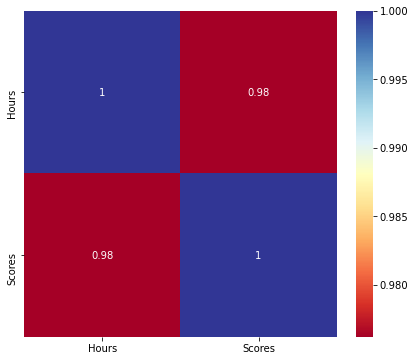

In [11]:
# plotting heatmap
plt.figure(figsize = [7,6])
sns.heatmap(student.corr(), annot = True , cmap = 'RdYlBu')
plt.show()

- here we can clearly see that the score is very high i.e. 0.98 
- that means.. if we increase the study hours the score will also increase.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Hours $

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [12]:
student.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
X = student['Hours']
y = student['Scores']

In [14]:
print(X.head())
print(y.head())

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64
0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


 ### Linear Regression using `linear_model` in `sklearn`
Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

### Train-Test Split
* we now need to split our variable into training and testing sets. we'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape

(20,)

In [17]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [18]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
y_predict= lm.predict(X_train)


In [20]:
print(lm.intercept_)
print(lm.coef_)

2.018160041434683
[9.91065648]


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r_squared = r2_score(y_train, y_predict)
r_squared


0.9515510725211552


The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared

- 1. The coefficient for Hours is 9.91.
- 2. R - squared of the train result is 0.9515
Meaning that 95% of the variance in scores is explained by Hours

This is a very decent R-squared value.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 1.989 + 9.835 \times Hours  $

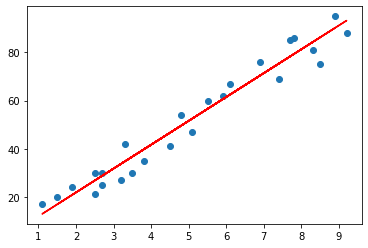

In [22]:
line = lm.coef_*X+lm.intercept_
plt.scatter(X, y)
plt.plot(X, line,'r');
plt.show()

In [23]:
#Predictions
print(X_test)
Y_pred = lm.predict(X_test) # scores' prediction
print("----\n---",Y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
----
--- [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [24]:
#Comparision between actual v/s predicted scores
df = pd.DataFrame({'Actual': y_test , 'Predicted': Y_pred}) 
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Step 4: Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [25]:
res = (y_test - Y_pred)

fig = plt.figure(figsize =[4,6])
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)           # Plot heading 
plt.xlabel('y_test - y_Pred', fontsize = 15)         X-label
plt.show()

SyntaxError: invalid syntax (<ipython-input-25-16d1f553717c>, line 6)

- The residuals are following the normally distributed with a mean 0. 
- We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

- Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.
- As you can see, the regression line is a pretty good fit to the data.

#### Visualizing the fit on the test set

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.4951 + 9.8717 * X_test, 'r')
plt.show()

In [ ]:
hr = [[9.25]]
print('Score of student who studied for 9.25 hours a day =', lm.predict(hr))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking for R square score train vs test

In [ ]:
print('r2 score of train is ===>>> ', r2_score(y_train, y_predict))
print('r2 score of test is ===>>> ',r2_score(y_test,Y_pred))

- as we can see r2 value of both test and train is almost similar and so we have a decent model.

##### Looking at the MAE,MSE,RMSE VALUES

In [ ]:
from sklearn import metrics

In [ ]:
# Mean Absolute Error
print("Mean absolute Error =",metrics.mean_absolute_error(y_test,Y_pred))
# Mean Squared Error
print("Mean squared Error =",metrics.mean_squared_error(y_test,Y_pred))
# Root Mean Squared Error
print("Root mean squared Error =",np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))

### FINAL CONCLUSION ===>>>

>> ### If the student studies for 9.25hrs/day then the Predicted score will be 93.69173248737538. 